In [9]:
import act
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import pyart
import xradar as xd
import glob
import tobac
import warnings
warnings.filterwarnings("ignore")

In [4]:
files = ['/data/project/ARM_Summer_School_2025/bnf/bnfcsapr2cfrS3.a1/bnfcsapr2cfrS3.a1.20250508.225146.nc',
'/data/project/ARM_Summer_School_2025/bnf/bnfcsapr2cfrS3.a1/bnfcsapr2cfrS3.a1.20250508.230130.nc',
'/data/project/ARM_Summer_School_2025/bnf/bnfcsapr2cfrS3.a1/bnfcsapr2cfrS3.a1.20250508.230148.nc',
'/data/project/ARM_Summer_School_2025/bnf/bnfcsapr2cfrS3.a1/bnfcsapr2cfrS3.a1.20250508.231158.nc',
'/data/project/ARM_Summer_School_2025/bnf/bnfcsapr2cfrS3.a1/bnfcsapr2cfrS3.a1.20250508.231216.nc',
'/data/project/ARM_Summer_School_2025/bnf/bnfcsapr2cfrS3.a1/bnfcsapr2cfrS3.a1.20250508.232200.nc',
'/data/project/ARM_Summer_School_2025/bnf/bnfcsapr2cfrS3.a1/bnfcsapr2cfrS3.a1.20250508.232219.nc',
'/data/project/ARM_Summer_School_2025/bnf/bnfcsapr2cfrS3.a1/bnfcsapr2cfrS3.a1.20250508.233202.nc',
'/data/project/ARM_Summer_School_2025/bnf/bnfcsapr2cfrS3.a1/bnfcsapr2cfrS3.a1.20250508.233241.nc',
'/data/project/ARM_Summer_School_2025/bnf/bnfcsapr2cfrS3.a1/bnfcsapr2cfrS3.a1.20250508.234240.nc',
'/data/project/ARM_Summer_School_2025/bnf/bnfcsapr2cfrS3.a1/bnfcsapr2cfrS3.a1.20250508.234258.nc',
'/data/project/ARM_Summer_School_2025/bnf/bnfcsapr2cfrS3.a1/bnfcsapr2cfrS3.a1.20250508.235242.nc',
'/data/project/ARM_Summer_School_2025/bnf/bnfcsapr2cfrS3.a1/bnfcsapr2cfrS3.a1.20250508.235301.nc',
'/data/project/ARM_Summer_School_2025/bnf/bnfcsapr2cfrS3.a1/bnfcsapr2cfrS3.a1.20250509.000000.nc',
'/data/project/ARM_Summer_School_2025/bnf/bnfcsapr2cfrS3.a1/bnfcsapr2cfrS3.a1.20250509.000244.nc',
'/data/project/ARM_Summer_School_2025/bnf/bnfcsapr2cfrS3.a1/bnfcsapr2cfrS3.a1.20250509.000303.nc',
'/data/project/ARM_Summer_School_2025/bnf/bnfcsapr2cfrS3.a1/bnfcsapr2cfrS3.a1.20250509.001246.nc',
'/data/project/ARM_Summer_School_2025/bnf/bnfcsapr2cfrS3.a1/bnfcsapr2cfrS3.a1.20250509.001304.nc',
'/data/project/ARM_Summer_School_2025/bnf/bnfcsapr2cfrS3.a1/bnfcsapr2cfrS3.a1.20250509.002248.nc',
'/data/project/ARM_Summer_School_2025/bnf/bnfcsapr2cfrS3.a1/bnfcsapr2cfrS3.a1.20250509.002306.nc',
'/data/project/ARM_Summer_School_2025/bnf/bnfcsapr2cfrS3.a1/bnfcsapr2cfrS3.a1.20250509.003250.nc',
'/data/project/ARM_Summer_School_2025/bnf/bnfcsapr2cfrS3.a1/bnfcsapr2cfrS3.a1.20250509.003308.nc',
'/data/project/ARM_Summer_School_2025/bnf/bnfcsapr2cfrS3.a1/bnfcsapr2cfrS3.a1.20250509.004230.nc',
'/data/project/ARM_Summer_School_2025/bnf/bnfcsapr2cfrS3.a1/bnfcsapr2cfrS3.a1.20250509.005206.nc',
'/data/project/ARM_Summer_School_2025/bnf/bnfcsapr2cfrS3.a1/bnfcsapr2cfrS3.a1.20250509.005225.nc',
'/data/project/ARM_Summer_School_2025/bnf/bnfcsapr2cfrS3.a1/bnfcsapr2cfrS3.a1.20250509.010208.nc',
'/data/project/ARM_Summer_School_2025/bnf/bnfcsapr2cfrS3.a1/bnfcsapr2cfrS3.a1.20250509.010226.nc',
'/data/project/ARM_Summer_School_2025/bnf/bnfcsapr2cfrS3.a1/bnfcsapr2cfrS3.a1.20250509.011211.nc',
'/data/project/ARM_Summer_School_2025/bnf/bnfcsapr2cfrS3.a1/bnfcsapr2cfrS3.a1.20250509.011229.nc',
'/data/project/ARM_Summer_School_2025/bnf/bnfcsapr2cfrS3.a1/bnfcsapr2cfrS3.a1.20250509.012213.nc',
'/data/project/ARM_Summer_School_2025/bnf/bnfcsapr2cfrS3.a1/bnfcsapr2cfrS3.a1.20250509.012231.nc',
'/data/project/ARM_Summer_School_2025/bnf/bnfcsapr2cfrS3.a1/bnfcsapr2cfrS3.a1.20250509.013212.nc',
'/data/project/ARM_Summer_School_2025/bnf/bnfcsapr2cfrS3.a1/bnfcsapr2cfrS3.a1.20250509.013230.nc',
'/data/project/ARM_Summer_School_2025/bnf/bnfcsapr2cfrS3.a1/bnfcsapr2cfrS3.a1.20250509.014214.nc',
'/data/project/ARM_Summer_School_2025/bnf/bnfcsapr2cfrS3.a1/bnfcsapr2cfrS3.a1.20250509.014233.nc',
'/data/project/ARM_Summer_School_2025/bnf/bnfcsapr2cfrS3.a1/bnfcsapr2cfrS3.a1.20250509.015216.nc',
'/data/project/ARM_Summer_School_2025/bnf/bnfcsapr2cfrS3.a1/bnfcsapr2cfrS3.a1.20250509.015234.nc',
'/data/project/ARM_Summer_School_2025/bnf/bnfcsapr2cfrS3.a1/bnfcsapr2cfrS3.a1.20250509.020218.nc',
'/data/project/ARM_Summer_School_2025/bnf/bnfcsapr2cfrS3.a1/bnfcsapr2cfrS3.a1.20250509.020237.nc',
'/data/project/ARM_Summer_School_2025/bnf/bnfcsapr2cfrS3.a1/bnfcsapr2cfrS3.a1.20250509.021221.nc',
'/data/project/ARM_Summer_School_2025/bnf/bnfcsapr2cfrS3.a1/bnfcsapr2cfrS3.a1.20250509.021251.nc',
'/data/project/ARM_Summer_School_2025/bnf/bnfcsapr2cfrS3.a1/bnfcsapr2cfrS3.a1.20250509.022222.nc',
'/data/project/ARM_Summer_School_2025/bnf/bnfcsapr2cfrS3.a1/bnfcsapr2cfrS3.a1.20250509.022241.nc',
'/data/project/ARM_Summer_School_2025/bnf/bnfcsapr2cfrS3.a1/bnfcsapr2cfrS3.a1.20250509.023224.nc',
'/data/project/ARM_Summer_School_2025/bnf/bnfcsapr2cfrS3.a1/bnfcsapr2cfrS3.a1.20250509.023242.nc',
'/data/project/ARM_Summer_School_2025/bnf/bnfcsapr2cfrS3.a1/bnfcsapr2cfrS3.a1.20250509.024226.nc',
'/data/project/ARM_Summer_School_2025/bnf/bnfcsapr2cfrS3.a1/bnfcsapr2cfrS3.a1.20250509.024244.nc',
'/data/project/ARM_Summer_School_2025/bnf/bnfcsapr2cfrS3.a1/bnfcsapr2cfrS3.a1.20250509.025152.nc',
'/data/project/ARM_Summer_School_2025/bnf/bnfcsapr2cfrS3.a1/bnfcsapr2cfrS3.a1.20250509.025211.nc',
'/data/project/ARM_Summer_School_2025/bnf/bnfcsapr2cfrS3.a1/bnfcsapr2cfrS3.a1.20250509.030154.nc',
'/data/project/ARM_Summer_School_2025/bnf/bnfcsapr2cfrS3.a1/bnfcsapr2cfrS3.a1.20250509.030213.nc',
'/data/project/ARM_Summer_School_2025/bnf/bnfcsapr2cfrS3.a1/bnfcsapr2cfrS3.a1.20250509.031156.nc',
'/data/project/ARM_Summer_School_2025/bnf/bnfcsapr2cfrS3.a1/bnfcsapr2cfrS3.a1.20250509.031215.nc',
'/data/project/ARM_Summer_School_2025/bnf/bnfcsapr2cfrS3.a1/bnfcsapr2cfrS3.a1.20250509.032145.nc',
'/data/project/ARM_Summer_School_2025/bnf/bnfcsapr2cfrS3.a1/bnfcsapr2cfrS3.a1.20250509.032203.nc',
'/data/project/ARM_Summer_School_2025/bnf/bnfcsapr2cfrS3.a1/bnfcsapr2cfrS3.a1.20250509.033212.nc',
'/data/project/ARM_Summer_School_2025/bnf/bnfcsapr2cfrS3.a1/bnfcsapr2cfrS3.a1.20250509.033230.nc',
'/data/project/ARM_Summer_School_2025/bnf/bnfcsapr2cfrS3.a1/bnfcsapr2cfrS3.a1.20250509.034214.nc',
'/data/project/ARM_Summer_School_2025/bnf/bnfcsapr2cfrS3.a1/bnfcsapr2cfrS3.a1.20250509.034232.nc',
'/data/project/ARM_Summer_School_2025/bnf/bnfcsapr2cfrS3.a1/bnfcsapr2cfrS3.a1.20250509.035205.nc',
'/data/project/ARM_Summer_School_2025/bnf/bnfcsapr2cfrS3.a1/bnfcsapr2cfrS3.a1.20250509.035223.nc',
'/data/project/ARM_Summer_School_2025/bnf/bnfcsapr2cfrS3.a1/bnfcsapr2cfrS3.a1.20250509.040207.nc',
'/data/project/ARM_Summer_School_2025/bnf/bnfcsapr2cfrS3.a1/bnfcsapr2cfrS3.a1.20250509.040225.nc',
'/data/project/ARM_Summer_School_2025/bnf/bnfcsapr2cfrS3.a1/bnfcsapr2cfrS3.a1.20250509.041209.nc',
'/data/project/ARM_Summer_School_2025/bnf/bnfcsapr2cfrS3.a1/bnfcsapr2cfrS3.a1.20250509.041227.nc',
'/data/project/ARM_Summer_School_2025/bnf/bnfcsapr2cfrS3.a1/bnfcsapr2cfrS3.a1.20250509.042215.nc',
'/data/project/ARM_Summer_School_2025/bnf/bnfcsapr2cfrS3.a1/bnfcsapr2cfrS3.a1.20250509.042233.nc',
'/data/project/ARM_Summer_School_2025/bnf/bnfcsapr2cfrS3.a1/bnfcsapr2cfrS3.a1.20250509.043217.nc',
'/data/project/ARM_Summer_School_2025/bnf/bnfcsapr2cfrS3.a1/bnfcsapr2cfrS3.a1.20250509.043235.nc',
'/data/project/ARM_Summer_School_2025/bnf/bnfcsapr2cfrS3.a1/bnfcsapr2cfrS3.a1.20250509.044219.nc',
'/data/project/ARM_Summer_School_2025/bnf/bnfcsapr2cfrS3.a1/bnfcsapr2cfrS3.a1.20250509.044237.nc',
'/data/project/ARM_Summer_School_2025/bnf/bnfcsapr2cfrS3.a1/bnfcsapr2cfrS3.a1.20250509.045221.nc',
'/data/project/ARM_Summer_School_2025/bnf/bnfcsapr2cfrS3.a1/bnfcsapr2cfrS3.a1.20250509.045239.nc',
'/data/project/ARM_Summer_School_2025/bnf/bnfcsapr2cfrS3.a1/bnfcsapr2cfrS3.a1.20250509.050223.nc',
'/data/project/ARM_Summer_School_2025/bnf/bnfcsapr2cfrS3.a1/bnfcsapr2cfrS3.a1.20250509.050241.nc',
'/data/project/ARM_Summer_School_2025/bnf/bnfcsapr2cfrS3.a1/bnfcsapr2cfrS3.a1.20250509.051225.nc',
'/data/project/ARM_Summer_School_2025/bnf/bnfcsapr2cfrS3.a1/bnfcsapr2cfrS3.a1.20250509.051244.nc',
'/data/project/ARM_Summer_School_2025/bnf/bnfcsapr2cfrS3.a1/bnfcsapr2cfrS3.a1.20250509.052228.nc',
'/data/project/ARM_Summer_School_2025/bnf/bnfcsapr2cfrS3.a1/bnfcsapr2cfrS3.a1.20250509.052246.nc',
'/data/project/ARM_Summer_School_2025/bnf/bnfcsapr2cfrS3.a1/bnfcsapr2cfrS3.a1.20250509.053230.nc',
'/data/project/ARM_Summer_School_2025/bnf/bnfcsapr2cfrS3.a1/bnfcsapr2cfrS3.a1.20250509.053248.nc',
'/data/project/ARM_Summer_School_2025/bnf/bnfcsapr2cfrS3.a1/bnfcsapr2cfrS3.a1.20250509.054248.nc',
'/data/project/ARM_Summer_School_2025/bnf/bnfcsapr2cfrS3.a1/bnfcsapr2cfrS3.a1.20250509.054307.nc',
'/data/project/ARM_Summer_School_2025/bnf/bnfcsapr2cfrS3.a1/bnfcsapr2cfrS3.a1.20250509.055251.nc',
'/data/project/ARM_Summer_School_2025/bnf/bnfcsapr2cfrS3.a1/bnfcsapr2cfrS3.a1.20250509.055309.nc',
'/data/project/ARM_Summer_School_2025/bnf/bnfcsapr2cfrS3.a1/bnfcsapr2cfrS3.a1.20250509.060226.nc',
'/data/project/ARM_Summer_School_2025/bnf/bnfcsapr2cfrS3.a1/bnfcsapr2cfrS3.a1.20250509.060244.nc',
'/data/project/ARM_Summer_School_2025/bnf/bnfcsapr2cfrS3.a1/bnfcsapr2cfrS3.a1.20250509.061228.nc',
'/data/project/ARM_Summer_School_2025/bnf/bnfcsapr2cfrS3.a1/bnfcsapr2cfrS3.a1.20250509.061246.nc',
'/data/project/ARM_Summer_School_2025/bnf/bnfcsapr2cfrS3.a1/bnfcsapr2cfrS3.a1.20250509.062230.nc',
'/data/project/ARM_Summer_School_2025/bnf/bnfcsapr2cfrS3.a1/bnfcsapr2cfrS3.a1.20250509.062249.nc',
'/data/project/ARM_Summer_School_2025/bnf/bnfcsapr2cfrS3.a1/bnfcsapr2cfrS3.a1.20250509.063233.nc',
'/data/project/ARM_Summer_School_2025/bnf/bnfcsapr2cfrS3.a1/bnfcsapr2cfrS3.a1.20250509.063251.nc',
'/data/project/ARM_Summer_School_2025/bnf/bnfcsapr2cfrS3.a1/bnfcsapr2cfrS3.a1.20250509.064003.nc',
'/data/project/ARM_Summer_School_2025/bnf/bnfcsapr2cfrS3.a1/bnfcsapr2cfrS3.a1.20250509.064947.nc',
'/data/project/ARM_Summer_School_2025/bnf/bnfcsapr2cfrS3.a1/bnfcsapr2cfrS3.a1.20250509.065006.nc',
'/data/project/ARM_Summer_School_2025/bnf/bnfcsapr2cfrS3.a1/bnfcsapr2cfrS3.a1.20250509.065949.nc',
'/data/project/ARM_Summer_School_2025/bnf/bnfcsapr2cfrS3.a1/bnfcsapr2cfrS3.a1.20250509.070008.nc']

In [149]:
files8 = sorted(glob.glob('/data/project/ARM_Summer_School_2025/bnf/bnfcsapr2cfrS3.a1/bnfcsapr2cfrS3.a1.20250508.23*'))
files9 = sorted(glob.glob('/data/project/ARM_Summer_School_2025/bnf/bnfcsapr2cfrS3.a1/bnfcsapr2cfrS3.a1.20250509.[012345678]*'))
files = files8.extend(files9)

In [5]:
def compute_number_of_points(extent, resolution):
    return int((extent[1] - extent[0])/resolution)

In [43]:
z_grid_points = compute_number_of_points(z_grid_limits, grid_resolution)
x_grid_points = compute_number_of_points(x_grid_limits, grid_resolution)
y_grid_points = compute_number_of_points(y_grid_limits, grid_resolution)

In [44]:
grid = pyart.map.grid_from_radars([radar],
                                  grid_shape=(z_grid_points,
                                              y_grid_points,
                                              x_grid_points),
                                  grid_limits=(z_grid_limits,
                                               y_grid_limits,
                                               x_grid_limits),
                                 )
grid

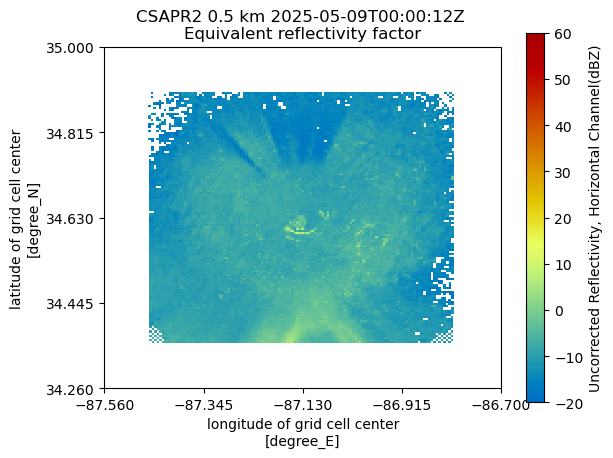

In [45]:
display = pyart.graph.GridMapDisplay(grid)
display.plot_grid('uncorrected_reflectivity_h',
                  level=0,
                  vmin=-20,
                  vmax=60,
                  cmap='HomeyerRainbow')

In [6]:
def scan_to_grid(file):
    radar = pyart.io.read(file)
    #dt = xd.io.open_cfradial1_datatree(file)
    #radar = pyart.xradar.Xradar(dt)
    
    z_grid_limits = (500.,15000.)
    y_grid_limits = (-120_000.,120_000.)
    x_grid_limits = (-120_000.,120_000.)
    grid_resolution = 1000
    
    z_grid_points = compute_number_of_points(z_grid_limits, grid_resolution)
    x_grid_points = compute_number_of_points(x_grid_limits, grid_resolution)
    y_grid_points = compute_number_of_points(y_grid_limits, grid_resolution)
    grid = pyart.map.grid_from_radars([radar],
                                  grid_shape=(z_grid_points,
                                              y_grid_points,
                                              x_grid_points),
                                  grid_limits=(z_grid_limits,
                                               y_grid_limits,
                                               x_grid_limits),
                                 )
    ds = grid.to_xarray()

    return ds

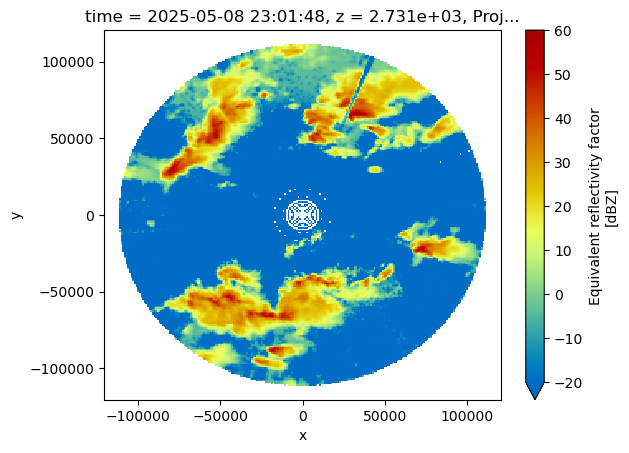

In [74]:
scan_to_grid(files[2]).isel(z=2).reflectivity.plot(cmap='HomeyerRainbow',
                                             vmin=-20,
                                             vmax=60);

In [75]:
my_scan.isel(z=2).reflectivity.plot(cmap='HomeyerRainbow',
                                             vmin=-20,
                                             vmax=60);

NameError: name 'my_scan' is not defined

In [77]:
file_num = 0
while (file_num <= len(files)):
    dt = xd.io.open_cfradial1_datatree(files[file_num])
    radar = pyart.xradar.Xradar(dt)
    #print(str(file_num) + " " + radar.scan_type + " " + radar.time_offset)
    if(file_num == 12 or file_num == 21):
        file_num += 1
    else:
        file_num += 2

KeyboardInterrupt: 

In [7]:
grid_files = []
counter = 0
while (counter <= len(files)):
    grid_file = scan_to_grid(files[counter])
    grid_files.append(grid_file) 
    print('Frame ' + str(counter) + ' completed')
    if(counter == 12 or counter == 21):
        counter += 1
    else:
        counter += 2

Frame 0 completed
Frame 2 completed
Frame 4 completed
Frame 6 completed
Frame 8 completed
Frame 10 completed
Frame 12 completed
Frame 13 completed
Frame 15 completed
Frame 17 completed
Frame 19 completed
Frame 21 completed
Frame 22 completed
Frame 24 completed
Frame 26 completed
Frame 28 completed
Frame 30 completed
Frame 32 completed
Frame 34 completed
Frame 36 completed
Frame 38 completed
Frame 40 completed
Frame 42 completed
Frame 44 completed
Frame 46 completed
Frame 48 completed
Frame 50 completed
Frame 52 completed
Frame 54 completed
Frame 56 completed
Frame 58 completed
Frame 60 completed
Frame 62 completed
Frame 64 completed
Frame 66 completed
Frame 68 completed
Frame 70 completed
Frame 72 completed
Frame 74 completed
Frame 76 completed
Frame 78 completed
Frame 80 completed
Frame 82 completed
Frame 84 completed
Frame 86 completed
Frame 88 completed
Frame 90 completed
Frame 92 completed
Frame 94 completed
Frame 96 completed


IndexError: list index out of range

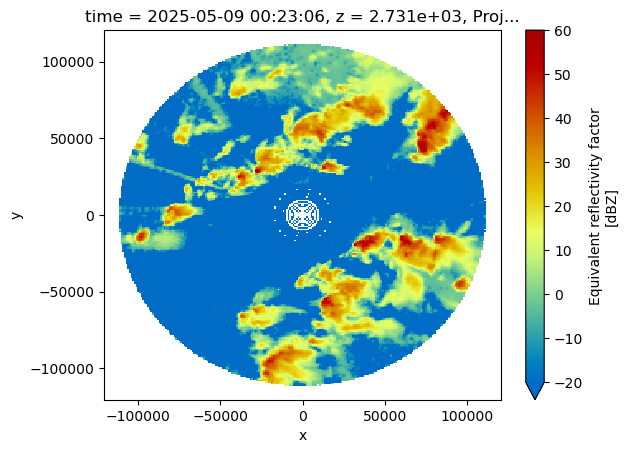

In [80]:
grid_files[10].isel(z=2).reflectivity.plot(cmap='HomeyerRainbow',
                                             vmin=-20,
                                             vmax=60);

In [81]:
number = 0

for file in grid_files:
    file.isel(z=2).reflectivity.plot(cmap='HomeyerRainbow',
                                             vmin=-20,
                                             vmax=60);
    plt.savefig('CSAPR_Frame_' + str(number))
    number += 1
    plt.clf()

<Figure size 640x480 with 0 Axes>

In [10]:
radar_features = tobac.feature_detection.feature_detection_multithreshold(
    grid_files, 0, **feature_detection_params
)
radar_features.to_hdf('table')
print('feature detection performed and saved')

NameError: name 'feature_detection_params' is not defined

In [11]:
feature_detection_params = dict()
feature_detection_params["threshold"] = [45, 50, 55]
feature_detection_params["target"] = "maximum"
feature_detection_params["position_threshold"] = "weighted_diff"
feature_detection_params["n_erosion_threshold"] = 0
feature_detection_params["sigma_threshold"] = 1
feature_detection_params["n_min_threshold"] = 4


In [12]:
concat_grid_files = xr.concat(grid_files, 'time')

In [13]:
radar_features = tobac.feature_detection.feature_detection_multithreshold(
    concat_grid_files.isel(z=2)['reflectivity'], 0, **feature_detection_params
)
print('feature detection performed and saved')

feature detection performed and saved


In [146]:
radar_features

,frame,idx,hdim_1,hdim_2,num,threshold_value,feature,time,timestr,z,lat,lon,y,x,ProjectionCoordinateSystem,projection,origin_latitude,origin_longitude,origin_altitude
0,0,4,64.144001,53.120231,22,30,1,2025-05-08 22:51:46,2025-05-08 22:51:46,<xarray.DataArray 'z' ()> Size: 8B\narray(2730...,34.128751,-87.857302,-55587.614004,-66657.508950,<xarray.DataArray 'ProjectionCoordinateSystem'...,<xarray.DataArray 'projection' ()> Size: 4B\na...,34.630806,-87.133118,180.0
1,0,6,74.207475,113.339403,55,30,2,2025-05-08 22:51:46,2025-05-08 22:51:46,<xarray.DataArray 'z' ()> Size: 8B\narray(2730...,34.221758,-87.200403,-45482.033847,-6186.373772,<xarray.DataArray 'ProjectionCoordinateSystem'...,<xarray.DataArray 'projection' ()> Size: 4B\na...,34.630806,-87.133118,180.0
2,0,7,78.457454,68.465198,37,30,3,2025-05-08 22:51:46,2025-05-08 22:51:46,<xarray.DataArray 'z' ()> Size: 8B\narray(2730...,34.258887,-87.690754,-41214.271835,-51248.336926,<xarray.DataArray 'ProjectionCoordinateSystem'...,<xarray.DataArray 'projection' ()> Size: 4B\na...,34.630806,-87.133118,180.0
3,0,10,158.234025,131.033373,10,30,4,2025-05-08 22:51:46,2025-05-08 22:51:46,<xarray.DataArray 'z' ()> Size: 8B\narray(2730...,34.980542,-87.005999,38896.092115,11581.629559,<xarray.DataArray 'ProjectionCoordinateSystem'...,<xarray.DataArray 'projection' ()> Size: 4B\na...,34.630806,-87.133118,180.0
4,0,11,170.781995,157.702979,7,30,5,2025-05-08 22:51:46,2025-05-08 22:51:46,<xarray.DataArray 'z' ()> Size: 8B\narray(2730...,35.093202,-86.711468,51496.563592,38362.823614,<xarray.DataArray 'ProjectionCoordinateSystem'...,<xarray.DataArray 'projection' ()> Size: 4B\na...,34.630806,-87.133118,180.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
352,43,1,129.776285,87.212637,6,30,353,2025-05-09 05:53:09,2025-05-09 05:53:09,<xarray.DataArray 'z' ()> Size: 8B\narray(2730...,34.723096,-87.487880,10319.282094,-32422.456164,<xarray.DataArray 'ProjectionCoordinateSystem'...,<xarray.DataArray 'projection' ()> Size: 4B\na...,34.630806,-87.133118,180.0
353,43,2,135.418718,80.405545,14,30,354,2025-05-09 05:53:09,2025-05-09 05:53:09,<xarray.DataArray 'z' ()> Size: 8B\narray(2730...,34.773812,-87.562937,15985.323549,-39258.030144,<xarray.DataArray 'ProjectionCoordinateSystem'...,<xarray.DataArray 'projection' ()> Size: 4B\na...,34.630806,-87.133118,180.0
354,45,1,130.350558,95.453340,29,30,355,2025-05-09 06:12:46,2025-05-09 06:12:46,<xarray.DataArray 'z' ()> Size: 8B\narray(2730...,34.728511,-87.397351,10895.957825,-24147.274098,<xarray.DataArray 'ProjectionCoordinateSystem'...,<xarray.DataArray 'projection' ()> Size: 4B\na...,34.630806,-87.133118,180.0
355,45,2,143.022291,104.114694,16,30,356,2025-05-09 06:12:46,2025-05-09 06:12:46,<xarray.DataArray 'z' ()> Size: 8B\narray(2730...,34.843116,-87.302412,23620.711057,-15449.679329,<xarray.DataArray 'ProjectionCoordinateSystem'...,<xarray.DataArray 'projection' ()> Size: 4B\na...,34.630806,-87.133118,180.0


In [14]:
#Tracking

# Keyword arguments for linking step:
parameters_linking={}
parameters_linking['method_linking']='predict'
parameters_linking['adaptive_stop']=0.2
parameters_linking['adaptive_step']=0.95
parameters_linking['extrapolate']=0
parameters_linking['order']=1
parameters_linking['subnetwork_size']=30
parameters_linking['memory']=0
parameters_linking['time_cell_min']=5*60
parameters_linking['v_max']=30

In [15]:
Track=tobac.linking_trackpy(radar_features,None,dt=600,dxy=500,**parameters_linking)

Frame 20: 1 trajectories present.


In [210]:
Track

,frame,idx,hdim_1,hdim_2,num,threshold_value,feature,time,timestr,z,...,lon,y,x,ProjectionCoordinateSystem,projection,origin_latitude,origin_longitude,origin_altitude,cell,time_cell
0,0,2,53.670996,90.348416,8,40,1,2025-05-08 22:51:46,2025-05-08 22:51:46,<xarray.DataArray 'z' ()> Size: 8B\narray(2730...,...,-87.450802,-66104.438790,-29273.557517,<xarray.DataArray 'ProjectionCoordinateSystem'...,<xarray.DataArray 'projection' ()> Size: 4B\na...,34.630806,-87.133118,180.0,1,0 days 00:00:00
1,0,3,60.313102,45.974936,7,40,2,2025-05-08 22:51:46,2025-05-08 22:51:46,<xarray.DataArray 'z' ()> Size: 8B\narray(2730...,...,-87.934922,-59434.541752,-73832.700368,<xarray.DataArray 'ProjectionCoordinateSystem'...,<xarray.DataArray 'projection' ()> Size: 4B\na...,34.630806,-87.133118,180.0,2,0 days 00:00:00
2,0,4,60.807724,61.717082,11,40,3,2025-05-08 22:51:46,2025-05-08 22:51:46,<xarray.DataArray 'z' ()> Size: 8B\narray(2730...,...,-87.763290,-58937.850244,-58024.687074,<xarray.DataArray 'ProjectionCoordinateSystem'...,<xarray.DataArray 'projection' ()> Size: 4B\na...,34.630806,-87.133118,180.0,3,0 days 00:00:00
3,0,5,62.859396,68.603727,13,40,4,2025-05-08 22:51:46,2025-05-08 22:51:46,<xarray.DataArray 'z' ()> Size: 8B\narray(2730...,...,-87.688309,-56877.593573,-51109.227913,<xarray.DataArray 'ProjectionCoordinateSystem'...,<xarray.DataArray 'projection' ()> Size: 4B\na...,34.630806,-87.133118,180.0,4,0 days 00:00:00
4,0,14,52.996643,101.474961,19,45,5,2025-05-08 22:51:46,2025-05-08 22:51:46,<xarray.DataArray 'z' ()> Size: 8B\narray(2730...,...,-87.329535,-66781.613851,-18100.457536,<xarray.DataArray 'ProjectionCoordinateSystem'...,<xarray.DataArray 'projection' ()> Size: 4B\na...,34.630806,-87.133118,180.0,5,0 days 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149,20,4,144.299389,212.434769,5,45,150,2025-05-09 02:02:37,2025-05-09 02:02:37,<xarray.DataArray 'z' ()> Size: 8B\narray(2730...,...,-86.110398,24903.152250,93323.617339,<xarray.DataArray 'ProjectionCoordinateSystem'...,<xarray.DataArray 'projection' ()> Size: 4B\na...,34.630806,-87.133118,180.0,33,0 days 00:40:06
150,21,2,146.718746,218.992927,7,40,151,2025-05-09 02:12:51,2025-05-09 02:12:51,<xarray.DataArray 'z' ()> Size: 8B\narray(2730...,...,-86.037942,27332.632080,99909.215154,<xarray.DataArray 'ProjectionCoordinateSystem'...,<xarray.DataArray 'projection' ()> Size: 4B\na...,34.630806,-87.133118,180.0,33,0 days 00:50:20
151,22,1,20.271039,97.562912,8,40,152,2025-05-09 02:22:41,2025-05-09 02:22:41,<xarray.DataArray 'z' ()> Size: 8B\narray(2730...,...,-87.371332,-99644.145435,-22028.874943,<xarray.DataArray 'ProjectionCoordinateSystem'...,<xarray.DataArray 'projection' ()> Size: 4B\na...,34.630806,-87.133118,180.0,35,0 days 00:00:00
152,23,1,22.457997,100.815783,10,40,153,2025-05-09 02:32:42,2025-05-09 02:32:42,<xarray.DataArray 'z' ()> Size: 8B\narray(2730...,...,-87.336057,-97448.036651,-18762.394053,<xarray.DataArray 'ProjectionCoordinateSystem'...,<xarray.DataArray 'projection' ()> Size: 4B\na...,34.630806,-87.133118,180.0,35,0 days 00:10:01


In [208]:
Track[Track["idx"] == 10]

,frame,idx,hdim_1,hdim_2,num,threshold_value,feature,time,timestr,z,...,lon,y,x,ProjectionCoordinateSystem,projection,origin_latitude,origin_longitude,origin_altitude,cell,time_cell
39,3,10,101.431826,201.808848,14,40,40,2025-05-08 23:22:19,2025-05-08 23:22:19,<xarray.DataArray 'z' ()> Size: 8B\narray(2730...,...,-86.231547,-18143.772705,82653.236319,<xarray.DataArray 'ProjectionCoordinateSystem'...,<xarray.DataArray 'projection' ()> Size: 4B\na...,34.630806,-87.133118,180.0,-1,NaT
55,4,10,145.862235,61.275685,25,40,56,2025-05-08 23:32:41,2025-05-08 23:32:41,<xarray.DataArray 'z' ()> Size: 8B\narray(2730...,...,-87.773985,26472.537724,-58467.931529,<xarray.DataArray 'ProjectionCoordinateSystem'...,<xarray.DataArray 'projection' ()> Size: 4B\na...,34.630806,-87.133118,180.0,-1,NaT
99,9,10,120.677159,35.279773,12,40,100,2025-05-09 00:13:04,2025-05-09 00:13:04,<xarray.DataArray 'z' ()> Size: 8B\narray(2730...,...,-88.057557,1182.084550,-84572.612406,<xarray.DataArray 'ProjectionCoordinateSystem'...,<xarray.DataArray 'projection' ()> Size: 4B\na...,34.630806,-87.133118,180.0,-1,NaT
109,10,10,148.455868,92.623989,5,40,110,2025-05-09 00:23:06,2025-05-09 00:23:06,<xarray.DataArray 'z' ()> Size: 8B\narray(2730...,...,-87.429027,29077.022338,-26988.463252,<xarray.DataArray 'ProjectionCoordinateSystem'...,<xarray.DataArray 'projection' ()> Size: 4B\na...,34.630806,-87.133118,180.0,-1,NaT
131,13,10,113.969974,199.589050,10,45,132,2025-05-09 00:52:25,2025-05-09 00:52:25,<xarray.DataArray 'z' ()> Size: 8B\narray(2730...,...,-86.254666,-5553.164041,80424.150776,<xarray.DataArray 'ProjectionCoordinateSystem'...,<xarray.DataArray 'projection' ()> Size: 4B\na...,34.630806,-87.133118,180.0,-1,NaT
142,17,10,142.881954,222.646592,5,50,143,2025-05-09 01:32:30,2025-05-09 01:32:30,<xarray.DataArray 'z' ()> Size: 8B\narray(2730...,...,-85.998205,23479.785993,103578.167403,<xarray.DataArray 'ProjectionCoordinateSystem'...,<xarray.DataArray 'projection' ()> Size: 4B\na...,34.630806,-87.133118,180.0,-1,NaT


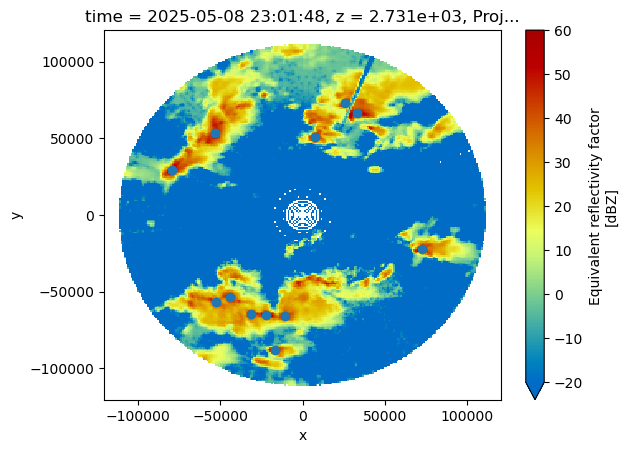

In [211]:
grid_files[1].isel(z=2).reflectivity.plot(cmap='HomeyerRainbow',
                                             vmin=-20,
                                             vmax=60)
plt.scatter(Track[Track["frame"]==1]["x"], Track[Track["frame"]==1]["y"])

In [173]:
number = 0
for file in grid_files:
    file.isel(z=2).reflectivity.plot(cmap='HomeyerRainbow',
                                             vmin=-20,
                                             vmax=60)
    plt.scatter(Track[Track["frame"]==number]["x"], Track[Track["frame"]==number]["y"])
    plt.savefig("Frame number " + str(number) + " - features included")
    plt.clf()
    number += 1

<Figure size 640x480 with 0 Axes>

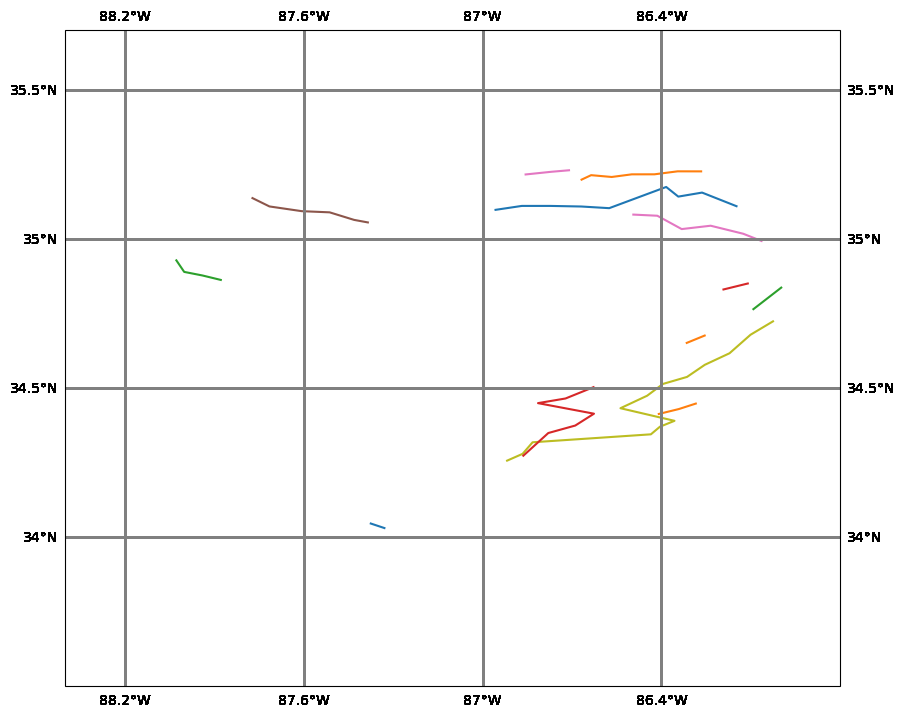

In [16]:
# Plot map with all individual tracks:
import cartopy.crs as ccrs
axis_extent=[-88.4,-85.8,33.5,35.7]

fig_map,ax_map=plt.subplots(figsize=(10,10),subplot_kw={'projection': ccrs.PlateCarree()})
ax_map=tobac.map_tracks(Track,axis_extent=axis_extent,axes=ax_map)
plt.savefig("Tracks.png")

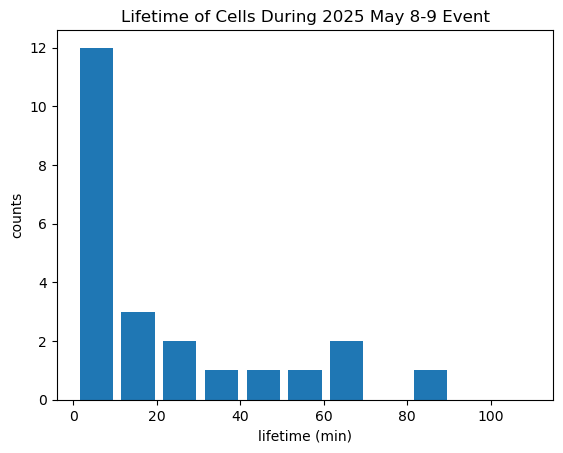

In [228]:
fig_lifetime,ax_lifetime=plt.subplots()
tobac.plot_lifetime_histogram_bar(Track,axes=ax_lifetime,bin_edges=np.arange(0,120,10),density=False,width_bar=8)
ax_lifetime.set_xlabel('lifetime (min)')
ax_lifetime.set_ylabel('counts')
ax_lifetime.set_title('Lifetime of Cells During 2025 May 8-9 Event')
plt.savefig('Lifetime_distribution.png')

In [18]:
# Lagrangian tracking

Points_of_interest = Track[Track['cell'] == 9]

In [260]:
Points_of_interest

,frame,idx,hdim_1,hdim_2,num,threshold_value,feature,time,timestr,z,...,lon,y,x,ProjectionCoordinateSystem,projection,origin_latitude,origin_longitude,origin_altitude,cell,time_cell
13,2,1,78.040941,139.195927,12,45,14,2025-05-08 23:12:16,2025-05-08 23:12:16,<xarray.DataArray 'z' ()> Size: 8B\narray(2730...,...,-86.917918,-41632.528292,19778.336824,<xarray.DataArray 'ProjectionCoordinateSystem'...,<xarray.DataArray 'projection' ()> Size: 4B\na...,34.630806,-87.133118,180.0,9,0 days 00:00:00
22,3,2,80.589710,143.959858,13,45,23,2025-05-08 23:22:19,2025-05-08 23:22:19,<xarray.DataArray 'z' ()> Size: 8B\narray(2730...,...,-86.865794,-39073.094463,24562.200737,<xarray.DataArray 'ProjectionCoordinateSystem'...,<xarray.DataArray 'projection' ()> Size: 4B\na...,34.630806,-87.133118,180.0,9,0 days 00:10:03
28,4,3,84.885124,147.008097,5,45,29,2025-05-08 23:32:41,2025-05-08 23:32:41,<xarray.DataArray 'z' ()> Size: 8B\narray(2730...,...,-86.832340,-34759.707831,27623.193564,<xarray.DataArray 'ProjectionCoordinateSystem'...,<xarray.DataArray 'projection' ()> Size: 4B\na...,34.630806,-87.133118,180.0,9,0 days 00:20:25
33,5,3,88.018175,183.276244,13,45,34,2025-05-08 23:42:58,2025-05-08 23:42:58,<xarray.DataArray 'z' ()> Size: 8B\narray(2730...,...,-86.435549,-31613.548327,64043.090335,<xarray.DataArray 'ProjectionCoordinateSystem'...,<xarray.DataArray 'projection' ()> Size: 4B\na...,34.630806,-87.133118,180.0,9,0 days 00:30:42
40,6,7,90.869742,186.037928,5,45,41,2025-05-08 23:53:01,2025-05-08 23:53:01,<xarray.DataArray 'z' ()> Size: 8B\narray(2730...,...,-86.405120,-28750.049896,66816.329622,<xarray.DataArray 'ProjectionCoordinateSystem'...,<xarray.DataArray 'projection' ()> Size: 4B\na...,34.630806,-87.133118,180.0,9,0 days 00:40:45
43,8,1,93.087702,190.484799,6,45,44,2025-05-09 00:03:03,2025-05-09 00:03:03,<xarray.DataArray 'z' ()> Size: 8B\narray(2730...,...,-86.356282,-26522.809613,71281.806721,<xarray.DataArray 'ProjectionCoordinateSystem'...,<xarray.DataArray 'projection' ()> Size: 4B\na...,34.630806,-87.133118,180.0,9,0 days 00:50:47
49,9,4,97.655912,173.887208,5,45,50,2025-05-09 00:13:04,2025-05-09 00:13:04,<xarray.DataArray 'z' ()> Size: 8B\narray(2730...,...,-86.537622,-21935.485943,54614.769365,<xarray.DataArray 'ProjectionCoordinateSystem'...,<xarray.DataArray 'projection' ()> Size: 4B\na...,34.630806,-87.133118,180.0,9,0 days 01:00:48
55,10,4,102.345963,182.025642,20,45,56,2025-05-09 00:23:06,2025-05-09 00:23:06,<xarray.DataArray 'z' ()> Size: 8B\narray(2730...,...,-86.448167,-17225.811023,62787.255233,<xarray.DataArray 'ProjectionCoordinateSystem'...,<xarray.DataArray 'projection' ()> Size: 4B\na...,34.630806,-87.133118,180.0,9,0 days 01:10:50
60,11,4,106.768967,186.849492,16,45,61,2025-05-09 00:33:08,2025-05-09 00:33:08,<xarray.DataArray 'z' ()> Size: 8B\narray(2730...,...,-86.394971,-12784.301334,67631.289403,<xarray.DataArray 'ProjectionCoordinateSystem'...,<xarray.DataArray 'projection' ()> Size: 4B\na...,34.630806,-87.133118,180.0,9,0 days 01:20:52
65,12,3,109.427461,194.193365,20,45,66,2025-05-09 00:42:30,2025-05-09 00:42:30,<xarray.DataArray 'z' ()> Size: 8B\narray(2730...,...,-86.314250,-10114.683619,75005.889690,<xarray.DataArray 'ProjectionCoordinateSystem'...,<xarray.DataArray 'projection' ()> Size: 4B\na...,34.630806,-87.133118,180.0,9,0 days 01:30:14


In [19]:
Lat_and_long = Points_of_interest[['lat','lon','frame']]
Lat_and_long

,lat,lon,frame
13,34.256206,-86.917918,2
22,34.279121,-86.865794,3
28,34.317835,-86.832340,4
33,34.344511,-86.435549,5
40,34.370086,-86.405120,6
43,34.389816,-86.356282,8
49,34.432088,-86.537622,9
55,34.473975,-86.448167,10
60,34.513610,-86.394971,11
65,34.537105,-86.314250,12


In [21]:
subset

NameError: name 'subset' is not defined

In [20]:
concat_grid_files.sel(time=subset.time.values)

NameError: name 'subset' is not defined

In [22]:
single_cell_ds_list = []
for time in Points_of_interest.time.values:
    subset = Points_of_interest.loc[Points_of_interest.time == time]
    single_cell_ds_list.append(concat_grid_files.sel(time=subset["time"].values,
                          y=subset["y"].values,
                          x=subset["x"].values,
                          method='nearest'))

single_cell_ds = xr.concat(single_cell_ds_list, dim='time')
single_cell_ds

In [27]:
single_cell_ds

<xarray.Dataset> Size: 5MB
Dimensions:                                                (time: 14, z: 14,
                                                            y: 14, x: 14,
                                                            nradar: 1)
Coordinates: (12/16)
  * z                                                      (z) float64 112B 5...
  * y                                                      (y) float64 112B -...
  * x                                                      (x) float64 112B 1...
  * time                                                   (time) datetime64[ns] 112B ...
    lat                                                    (time, y, x) float64 22kB ...
    lon                                                    (time, y, x) float64 22kB ...
    ...                                                     ...
    origin_altitude                                        (time) float32 56B ...
    radar_altitude                                         (nradar) float32 4B ...
    radar_latitude                                         (nradar) float32 4B ...
    radar_longitude                                        (nradar) float32 4B ...
    radar_time                                             (time, nradar) float64 112B ...
    radar_name                                             (nradar) <U6 24B '...
Dimensions without coordinates: nradar
Data variables: (12/33)
    unthresholded_power_copolar_h                          (time, z, y, x) float32 154kB ...
    signal_to_noise_ratio_copolar_v                        (time, z, y, x) float32 154kB ...
    spectral_width                                         (time, z, y, x) float32 154kB ...
    uncorrected_spectral_width_h                           (time, z, y, x) float32 154kB ...
    reflectivity_v                                         (time, z, y, x) float32 154kB ...
    uncorrected_differential_reflectivity_lag_1            (time, z, y, x) float32 154kB ...
    ...                                                     ...
    uncorrected_spectral_width_v                           (time, z, y, x) float32 154kB ...
    classification_mask                                    (time, z, y, x) float64 307kB ...
    mean_doppler_velocity_v                                (time, z, y, x) float32 154kB ...
    uncorrected_mean_doppler_velocity_v                    (time, z, y, x) float32 154kB ...
    reflectivity                                           (time, z, y, x) float32 154kB ...
    ROI                                                    (time, z, y, x) float32 154kB ...
Attributes: (12/35)
    radar_name:            CSAPR2
    nradar:                1
    command_line:          sapr2cfr_ingest -n csapr2cfr -R --max-runtime 0 -s...
    Conventions:           ARM-1.3 CF/Radial-1.4 instrument_parameters radar_...
    process_version:       sapr2cfr-1.7.1
    dod_version:           csapr2cfr-a1-1.0
    ...                    ...
    template_name:         BNF-ppi-15
    history:               created by user dsmgr on machine prod-proc3.adc.ar...
    volume_number:         0
    platform_type:         fixed
    instrument_type:       radar
    primary_axis:          axis_z

In [24]:
single_cell_ds["time"] = single_cell_ds.indexes["time"].to_datetimeindex()

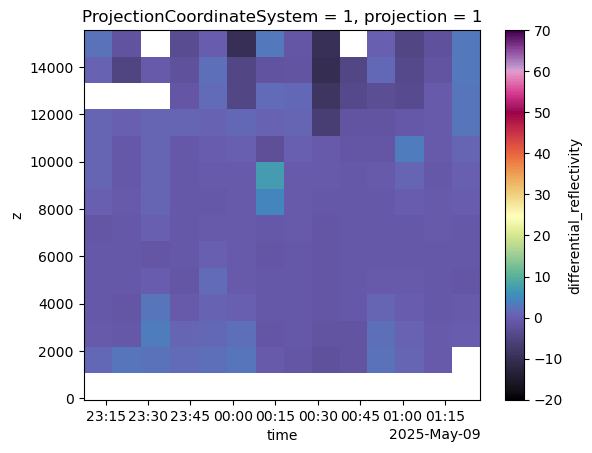

In [50]:
single_cell_ds.differential_reflectivity.mean(dim=["x", "y",]).plot(vmin=-20, vmax=70, cmap='ChaseSpectral', y='z')

AttributeError: 'Axes' object has no attribute 'single_cell_ds'

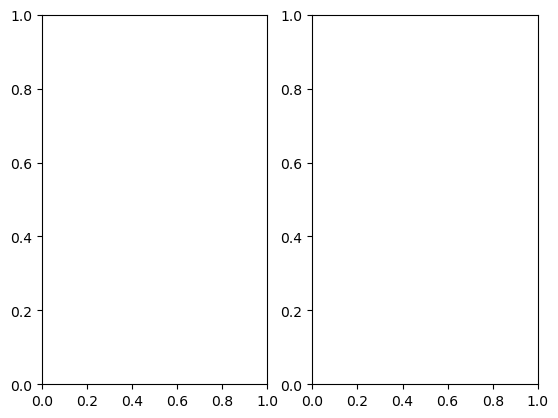

In [45]:
fig, axes = plt.subplots(nrows=1, ncols=2)

axes[0].single_cell_ds.mean_doppler_velocity.mean(dim=["x", "y",]).plot(vmin=-20, vmax=70, cmap='ChaseSpectral', y='z')
axes[1].single_cell_ds.reflectivity.mean(dim=["x", "y",]).plot(vmin=-20, vmax=70, cmap='ChaseSpectral', y='z')
plt.show()

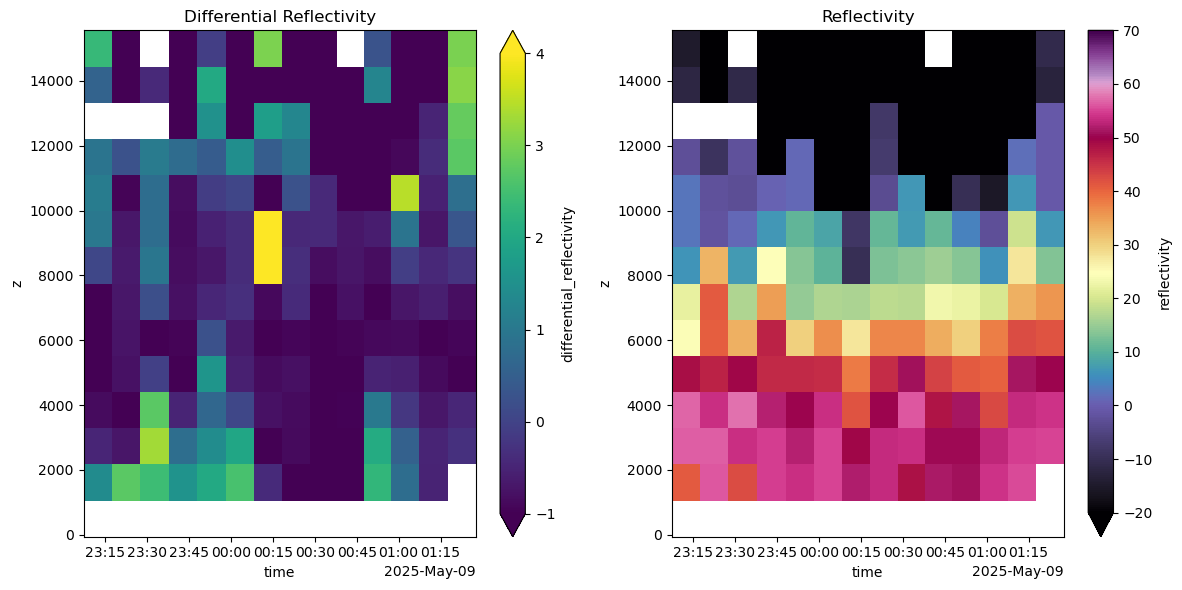

In [61]:
# Create a 1-row, 2-column plot
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Access the dataset directly, not through axes
single_cell_ds.differential_reflectivity.mean(dim=["x", "y"]).plot(
    ax=axes[0], vmin=-1, vmax=4, y='z'
)

single_cell_ds.reflectivity.mean(dim=["x", "y"]).plot(
    ax=axes[1], vmin=-20, vmax=70, cmap='ChaseSpectral', y='z'
)

# Optional: Add titles
axes[0].set_title("Differential Reflectivity")
axes[1].set_title("Reflectivity")

# Show the plot
plt.tight_layout()
plt.savefig('reflectivity_and_dif_reflectivity.png')
plt.show()